<a href="https://colab.research.google.com/github/ChewPeng/R/blob/main/R_PreConf_Intro_to_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Linear Regression**


Prepared by:
    
Dr. Gan Chew Peng
<br><br>

LinkedIn: [ChewPeng](https://www.linkedin.com/in/chew-peng-gan-03b516a6/)

Github: [R](https://github.com/ChewPeng/R/blob/main/R_PreConf_Intro_to_Linear_Regression.ipynb) 

## Data Loading


In this session, we are going to use [insurance.csv](https://github.com/ChewPeng/R/blob/main/insurance.csv) dataset. Take note that this dataset was downloaded from [Kaggle](https://www.kaggle.com/mirichoi0218/insurance).

------

1: Read the `insurance.csv`

In [1]:
df <- read.csv("https://raw.githubusercontent.com/ChewPeng/R/main/insurance.csv",
                  header=T, 
                  sep=",",
                  strip.white=T,
                  stringsAsFactors = T)


head(df)

dim(df)



,age,sex,bmi,children,smoker,region,charges
,<int>,<fct>,<dbl>,<int>,<fct>,<fct>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,31,female,25.740,0,no,southeast,3756.622


[1] 1338    7

2: Summary of the data

In [ ]:
summary(df)

      age            sex           bmi           children     smoker    
 Min.   :18.00   female:662   Min.   :15.96   Min.   :0.000   no :1064  
 1st Qu.:27.00   male  :676   1st Qu.:26.30   1st Qu.:0.000   yes: 274  
 Median :39.00                Median :30.40   Median :1.000             
 Mean   :39.21                Mean   :30.66   Mean   :1.095             
 3rd Qu.:51.00                3rd Qu.:34.69   3rd Qu.:2.000             
 Max.   :64.00                Max.   :53.13   Max.   :5.000             
       region       charges     
 northeast:324   Min.   : 1122  
 northwest:325   1st Qu.: 4740  
 southeast:364   Median : 9382  
 southwest:325   Mean   :13270  
                 3rd Qu.:16640  
                 Max.   :63770  

------

## Linear Regression : Factors affecting `charges`

The mathematical formula of the linear regression can be written as `y = b0 + b1*x + e`, where:

`b0` and `b1` are known as the regression coefficients or parameters:
*   `b0` is the intercept of the regression line; that is the predicted value when `x = 0`.
*   `b1` is the slope of the regression line.
*   `e` is the error term (also known as the residuals), the part of `y` that cannot be explained by the regression model



In [ ]:
cor(df[, unlist(lapply(df, is.numeric))]) 


,age,bmi,children,charges
age,1.0000000,0.1092719,0.04246900,0.29900819
bmi,0.1092719,1.0000000,0.01275890,0.19834097
children,0.0424690,0.0127589,1.00000000,0.06799823
charges,0.2990082,0.1983410,0.06799823,1.00000000


Now , let us investigate the relationship between `charges` and `age` . 

**1: Simple Linear Regression**

The simple linear regression tries to find the best fit line to represent the relationship between y and x. 

The linear model equation can be written as follow: 

```
charges = b0 + b1 * age
```

The R function `lm()` can be used to determine the beta coefficients of the linear model:

In [ ]:
model1 <- lm(charges ~  age, data = df)
model1


Call:
lm(formula = charges ~ age, data = df)

Coefficients:
(Intercept)          age  
     3165.9        257.7  


**2: Scatter Plot**

`geom_smooth()` using formula 'y ~ x'



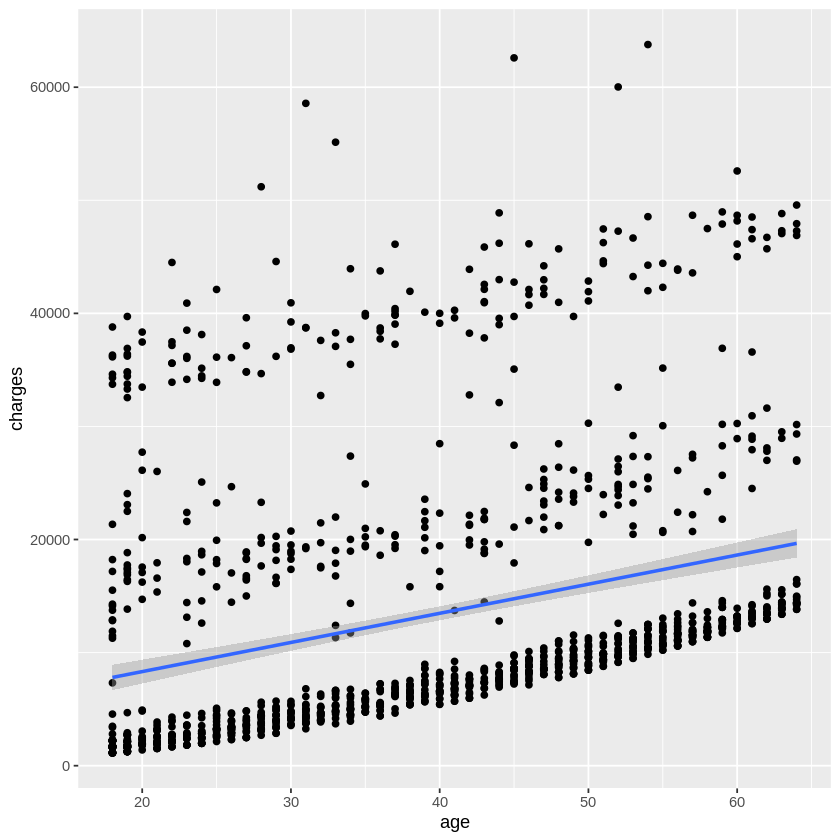

In [ ]:
library(ggplot2)

ggplot(df, aes(x=age, y=	charges)) +
  geom_point() +
  stat_smooth(method = lm)

**3: Statistical Summary of the Regression Model**




In [ ]:
summary(model1)


Call:
lm(formula = charges ~ age, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
 -8059  -6671  -5939   5440  47829 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3165.9      937.1   3.378 0.000751 ***
age            257.7       22.5  11.453  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11560 on 1336 degrees of freedom
Multiple R-squared:  0.08941,	Adjusted R-squared:  0.08872 
F-statistic: 131.2 on 1 and 1336 DF,  p-value: < 2.2e-16


**4: Outlier**

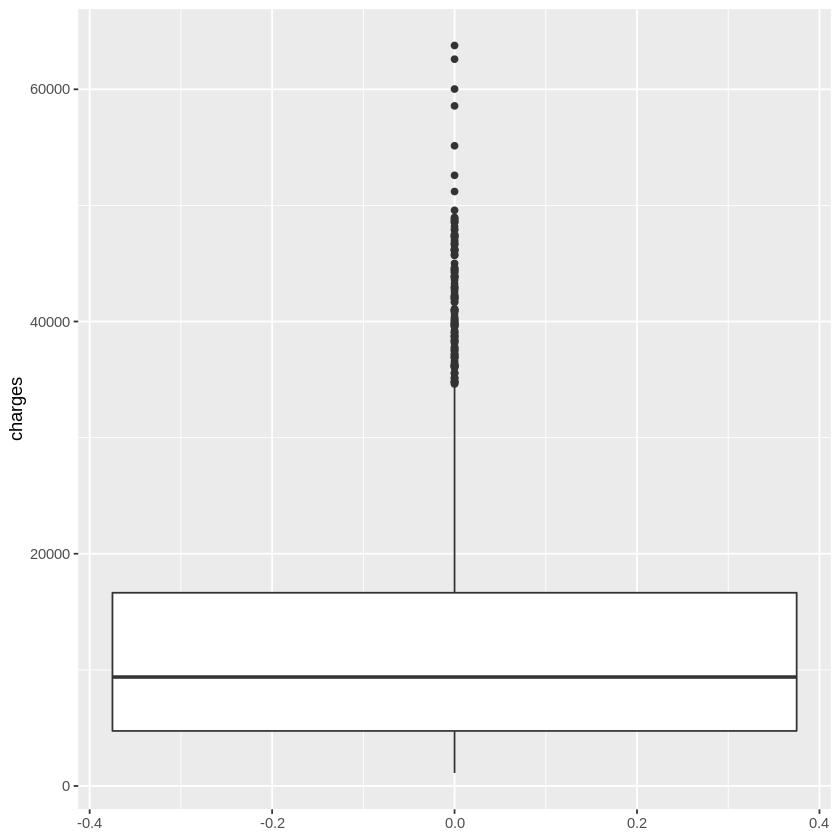

In [ ]:
ggplot(df, aes(y=charges)) +
  geom_boxplot() 

In [ ]:
Q1 <- quantile(df$charges, .25)
Q3 <- quantile(df$charges, .75)
IQR <- IQR(df$charges)

In [ ]:
df_no_outliers <- subset(df, 
                         df$charges> (Q1 - 1.5*IQR) &
                          df$charges< (Q3 + 1.5*IQR))


dim(df_no_outliers)

[1] 1199    7

`geom_smooth()` using formula 'y ~ x'



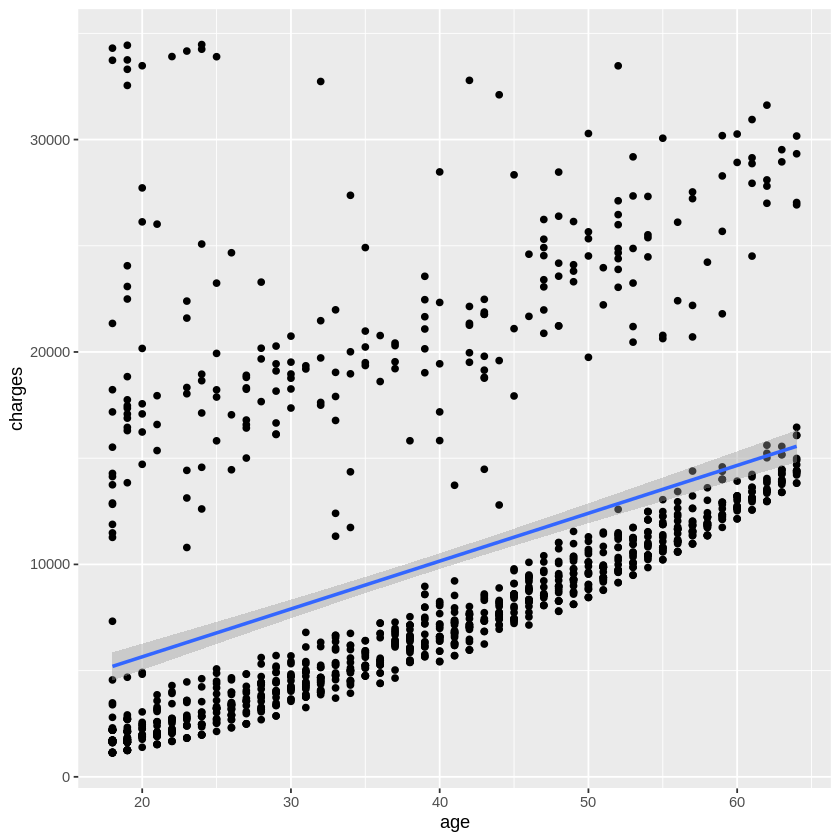

In [ ]:
ggplot(df_no_outliers, aes(x=age, y=charges)) +
  geom_point() +
  stat_smooth(method = lm)

**5: LR Model Fitting using *`df_no_outliers`***

In [ ]:
model2 <- lm(charges ~  age,  data = df_no_outliers)
model2


Call:
lm(formula = charges ~ age, data = df_no_outliers)

Coefficients:
(Intercept)          age  
     1144.7        225.3  


In [ ]:
summary(model2)


Call:
lm(formula = charges ~ age, data = df_no_outliers)

Residuals:
   Min     1Q Median     3Q    Max 
 -4874  -3624  -2765  -1266  29104 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1144.67     554.45   2.064   0.0392 *  
age           225.27      13.38  16.840   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6514 on 1197 degrees of freedom
Multiple R-squared:  0.1915,	Adjusted R-squared:  0.1909 
F-statistic: 283.6 on 1 and 1197 DF,  p-value: < 2.2e-16


**6: Multivariate Linear Regression**

In [ ]:
colnames(df)

[1] "age"      "sex"      "bmi"      "children" "smoker"   "region"   "charges"

In [ ]:
model3 <- lm(charges ~  ., 
            data = df_no_outliers)
model3

summary(model3)


Call:
lm(formula = charges ~ ., data = df_no_outliers)

Coefficients:
    (Intercept)              age          sexmale              bmi  
       -2879.21           242.52          -365.92            68.18  
       children        smokeryes  regionnorthwest  regionsoutheast  
         415.54         14646.33          -280.18         -1048.61  
regionsouthwest  
       -1310.63  



Call:
lm(formula = charges ~ ., data = df_no_outliers)

Residuals:
    Min      1Q  Median      3Q     Max 
-5620.4 -1833.6 -1318.0  -563.7 24344.6 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2879.209    812.499  -3.544 0.000410 ***
age               242.517      9.479  25.585  < 2e-16 ***
sexmale          -365.922    264.236  -1.385 0.166364    
bmi                68.182     23.735   2.873 0.004144 ** 
children          415.537    108.877   3.817 0.000142 ***
smokeryes       14646.328    429.073  34.135  < 2e-16 ***
regionnorthwest  -280.175    372.909  -0.751 0.452606    
regionsoutheast -1048.608    383.307  -2.736 0.006318 ** 
regionsouthwest -1310.633    378.886  -3.459 0.000561 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4569 on 1190 degrees of freedom
Multiple R-squared:  0.6045,	Adjusted R-squared:  0.6018 
F-statistic: 227.4 on 8 and 1190 DF,  p-value: < 2.2e-16


In [ ]:
model4 <- lm(charges ~  age + 
                        bmi  + 
                        children + 
                        smoker+
                        region, 
            data = df)
model4

summary(model4)


Call:
lm(formula = charges ~ age + bmi + children + smoker + region, 
    data = df)

Coefficients:
    (Intercept)              age              bmi         children  
       -11990.3            257.0            338.7            474.6  
      smokeryes  regionnorthwest  regionsoutheast  regionsouthwest  
        23836.3           -352.2          -1034.4           -959.4  



Call:
lm(formula = charges ~ age + bmi + children + smoker + region, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-11367.2  -2835.4   -979.7   1361.9  29935.5 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11990.27     978.76 -12.250  < 2e-16 ***
age                256.97      11.89  21.610  < 2e-16 ***
bmi                338.66      28.56  11.858  < 2e-16 ***
children           474.57     137.74   3.445 0.000588 ***
smokeryes        23836.30     411.86  57.875  < 2e-16 ***
regionnorthwest   -352.18     476.12  -0.740 0.459618    
regionsoutheast  -1034.36     478.54  -2.162 0.030834 *  
regionsouthwest   -959.37     477.78  -2.008 0.044846 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6060 on 1330 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7496 
F-statistic: 572.7 on 7 and 1330 DF,  p-value: < 2.2e-16


In [ ]:
model5 <- lm(charges ~ . ,
            data = df)
model5

summary(model5)


Call:
lm(formula = charges ~ ., data = df)

Coefficients:
    (Intercept)              age          sexmale              bmi  
       -11938.5            256.9           -131.3            339.2  
       children        smokeryes  regionnorthwest  regionsoutheast  
          475.5          23848.5           -353.0          -1035.0  
regionsouthwest  
         -960.1  



Call:
lm(formula = charges ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-11304.9  -2848.1   -982.1   1393.9  29992.8 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11938.5      987.8 -12.086  < 2e-16 ***
age                256.9       11.9  21.587  < 2e-16 ***
sexmale           -131.3      332.9  -0.394 0.693348    
bmi                339.2       28.6  11.860  < 2e-16 ***
children           475.5      137.8   3.451 0.000577 ***
smokeryes        23848.5      413.1  57.723  < 2e-16 ***
regionnorthwest   -353.0      476.3  -0.741 0.458769    
regionsoutheast  -1035.0      478.7  -2.162 0.030782 *  
regionsouthwest   -960.0      477.9  -2.009 0.044765 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.8 on 8 and 1329 DF,  p-value: < 2.2e-16


**7: Plot**

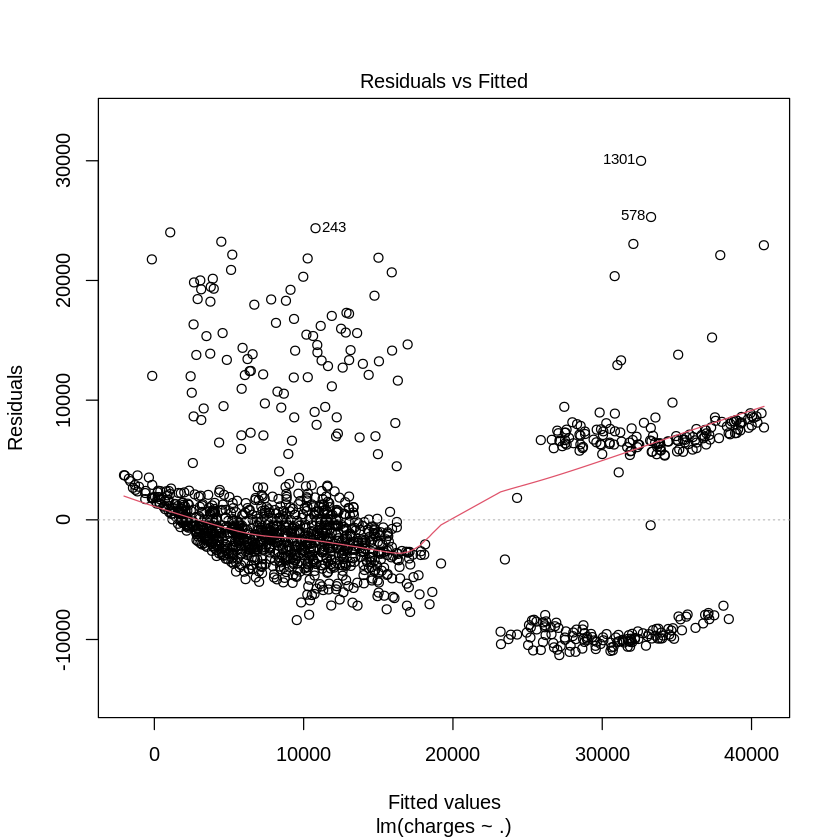

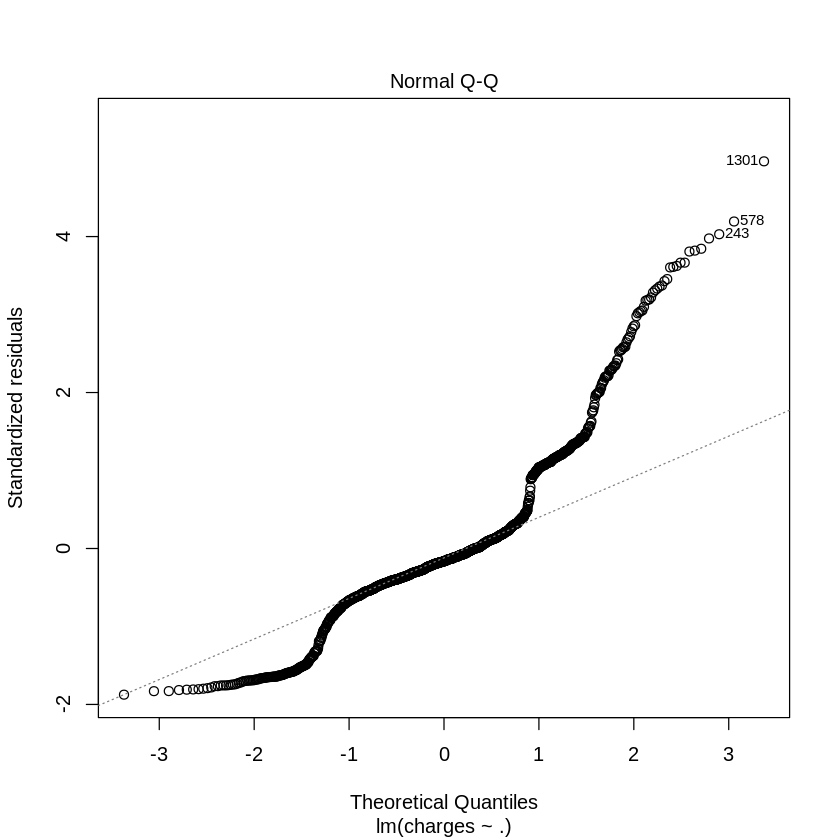

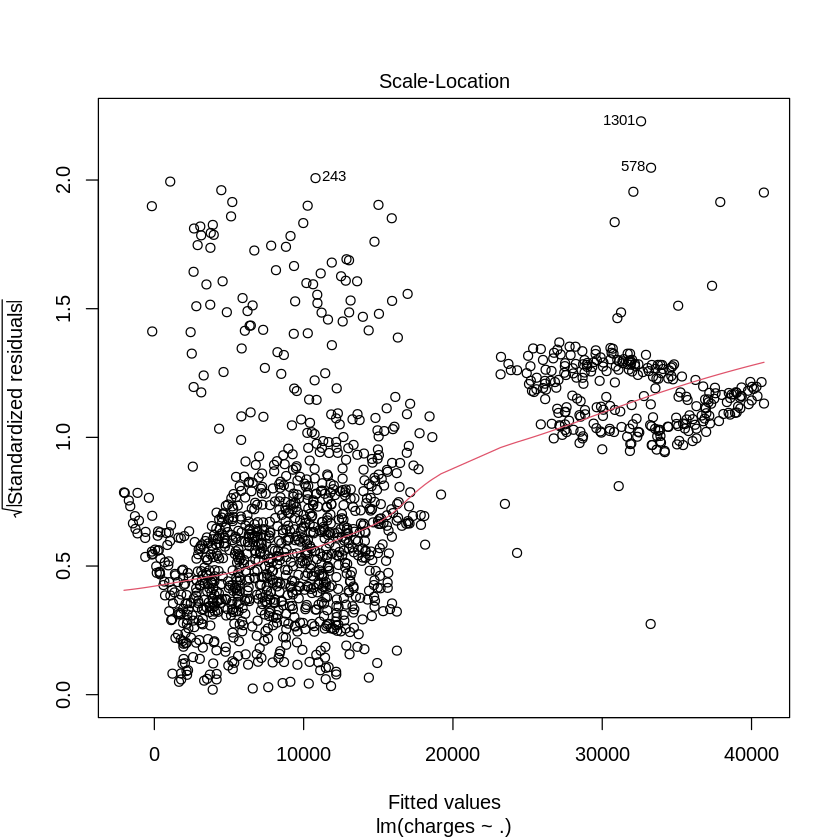

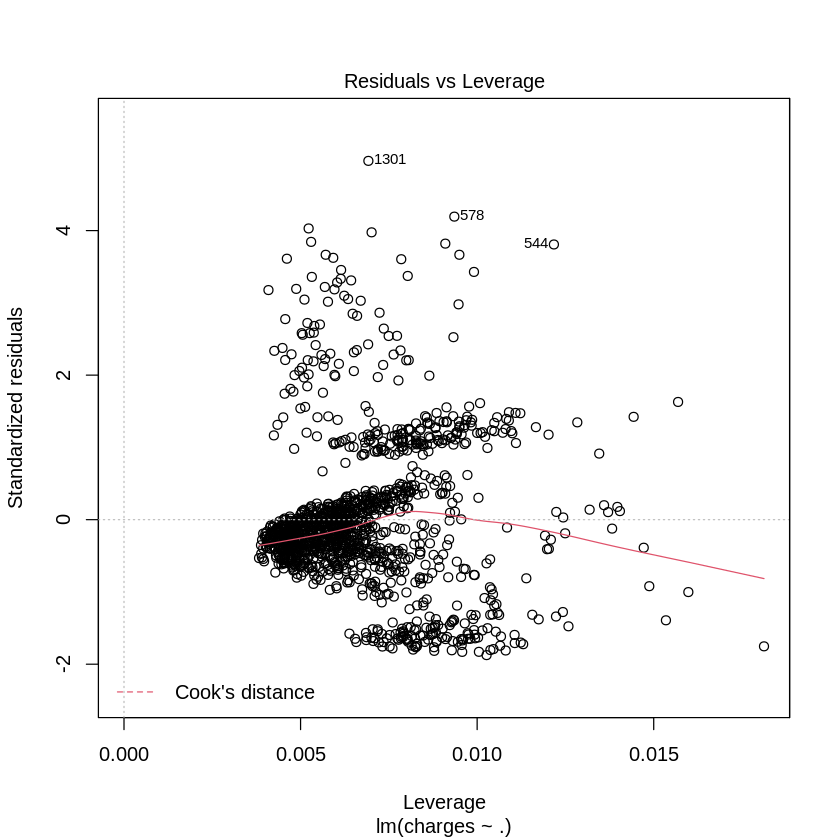

In [ ]:
plot(model5)

**8: Improvement**

Referring to plots, #1301 , #578 and #544, #243 are outliers. Let us remove these points and then rerun the linear model again. 

In [ ]:
library(dplyr)
df_new <- df %>% slice(-c(1301,578,544,243))
dim(df_new)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] 1334    7

In [ ]:
model5_improve <- lm(charges ~  ., 
            data = df_new)

summary(model5_improve)


Call:
lm(formula = charges ~ ., data = df_new)

Residuals:
     Min       1Q   Median       3Q      Max 
-11106.3  -2772.4   -968.3   1318.1  24056.6 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11700.46     963.52 -12.143  < 2e-16 ***
age                254.33      11.60  21.932  < 2e-16 ***
sexmale            -45.25     324.69  -0.139 0.889178    
bmi                330.95      27.94  11.845  < 2e-16 ***
children           509.31     134.24   3.794 0.000155 ***
smokeryes        23575.32     403.99  58.357  < 2e-16 ***
regionnorthwest   -284.13     463.99  -0.612 0.540404    
regionsoutheast  -1059.73     467.04  -2.269 0.023425 *  
regionsouthwest   -954.60     466.05  -2.048 0.040732 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5901 on 1325 degrees of freedom
Multiple R-squared:  0.7553,	Adjusted R-squared:  0.7538 
F-statistic: 511.1 on 8 and 1325 DF,  p-value: < 2.2e-16


**9: Real-time Demo**

Go to the following Page and Repeat the analysis:

https://www.richieyyptutorialpage.com/demo-r-series/linear-regression-analysis 






------